# ***Loading libraries to load data set***

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [28]:
train = pd.read_csv('train_new.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0         120       RL     4.219508  8.502689   Pave  none      IR1   
1          20       RL     4.553877  9.671871   Pave  none      IR1   
2          60       RL     4.521789  9.202308   Pave  none      IR1   
3          20       RL     4.653960  9.371694   Pave  none      IR1   
4          20       RL     4.174387  9.719264   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr  6.864848   
1       1043         2217    GasA        Ex          Y      SBrkr  7.703910   
2        255         1117    GasA        Ex          Y      SBrkr  7.027315   
3       1139         1844    GasA        Ex          Y      SBrkr  7.519692   
4        356         1602    GasA        Gd          Y      SBrkr  7.379008   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0   6.864848             0             0         2   
1         0             0   7.703910             1             0         2   
2       886             0   7.607381             1             0         2   
3         0             0   7.519692             0             0         2   
4         0             0   7.379008             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf 

In [29]:
print("Number of missing value data points in train data set is {}".format(train.isnull().sum().sum()))

Number of missing value data points in train data set is 0


# CREATING SEPERATE OBJECT FOR CATEGORICAL AND NUMERICAL VARIABLES

In [30]:
#creating object for Numerical Variables
num_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
          'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice','diff_year_built','diff_year_remod']

In [31]:
#creating object for Categorical Variables
cat_var = []
for i in train.columns:
    if i not in num_var:
        cat_var.append(i)

In [32]:
print("  The number of numerical variables are :", len(num_var), '\n' , "The number of categorical variables are :",len(cat_var))

  The number of numerical variables are : 21 
 The number of categorical variables are : 57


# CHECKING CORRELATION OF NUMERICAL VARIABLES

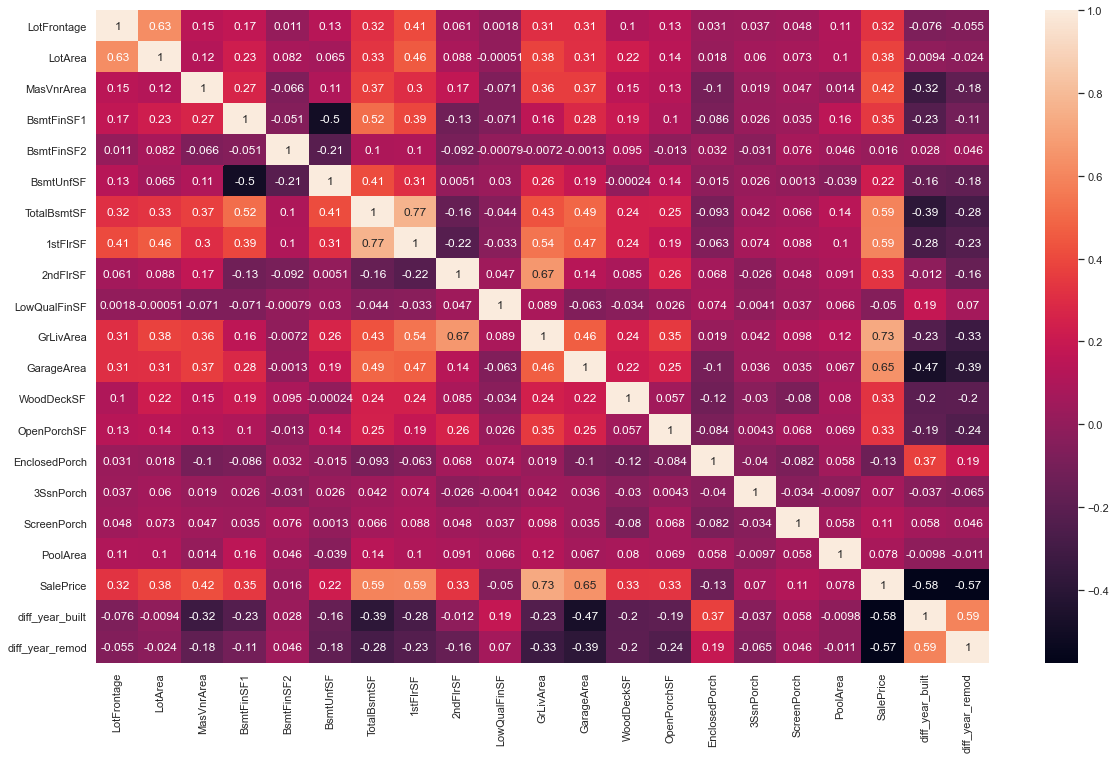

In [33]:
#checking the correlation of numeric variables with the target variable

num_corr = train[num_var].corr(method='pearson')
plt.figure(figsize=(20,12))
# mask = np.triu(np.ones_like(num_corr, dtype=bool))
sns.heatmap(num_corr,annot=True,cbar=True)
plt.show()

In [34]:
#sorting correlation values in descending order
sorted_corr_mat = num_corr['SalePrice'].sort_values(ascending=False)
sorted_corr_mat

SalePrice          1.000000
GrLivArea          0.729688
GarageArea         0.646119
1stFlrSF           0.594597
TotalBsmtSF        0.591996
MasVnrArea         0.419153
LotArea            0.381628
BsmtFinSF1         0.346009
OpenPorchSF        0.332814
2ndFlrSF           0.331904
WoodDeckSF         0.328195
LotFrontage        0.324063
BsmtUnfSF          0.220048
ScreenPorch        0.113798
PoolArea           0.078335
3SsnPorch          0.070315
BsmtFinSF2         0.015979
LowQualFinSF      -0.050323
EnclosedPorch     -0.133615
diff_year_remod   -0.572627
diff_year_built   -0.576015
Name: SalePrice, dtype: float64

we can see that there are many variables showing positive correlation with the target variable however there is also multicollinearity. I will be selecting all the features having correlation above 0.3 and below -0.3. I will also build the model using all the variables with lasso and Random forest regressor as they will be able to provide feature importance with in

In [35]:
#all numerical variable
all_num_var = train[num_var]
all_num_var.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.219508  8.502689         0.0         120           0        958   
1     4.553877  9.671871         0.0         351         823       1043   
2     4.521789  9.202308         0.0         862           0        255   
3     4.653960  9.371694       480.0         705           0       1139   
4     4.174387  9.719264       126.0        1246           0        356   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0         1078  6.864848         0             0   6.864848         440   
1         2217  7.703910         0             0   7.703910         621   
2         1117  7.027315       886             0   7.607381         455   
3         1844  7.519692         0             0   7.519692         546   
4         1602  7.379008         0             0   7.379008         529   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   
2         180          130              0          0            0         0   
3           0          122              0          0            0         0   
4         240            0              0          0            0         0   

   SalePrice  diff_year_built  diff_year_remod  
0  11.759786               31               31  
1  12.498742               37               37  
2  12.505399               11               10  
3  12.154779               33               33  
4  12.278393               32                9

In [37]:
#filtering top numerical variables
top_num_var = train[['GrLivArea','GarageArea','1stFlrSF','2ndFlrSF','MasVnrArea','OpenPorchSF','BsmtFinSF1','LotFrontage',
                    'WoodDeckSF','diff_year_built','diff_year_remod']]

In [40]:
#checkig the distribution of all the numerical variable if they are normally distributed or not

from scipy import stats

def qqplot(data):

    for i in all_num_var.columns:
        if 0 not in data[i].unique():
            plt.figure(figsize=(18,8))
            plt.subplot(1,2,1)
            sns.histplot(data[i])
    
            plt.subplot(1,2,2)
            stats.probplot(data[i],dist='norm',plot=plt)
    
            plt.show()

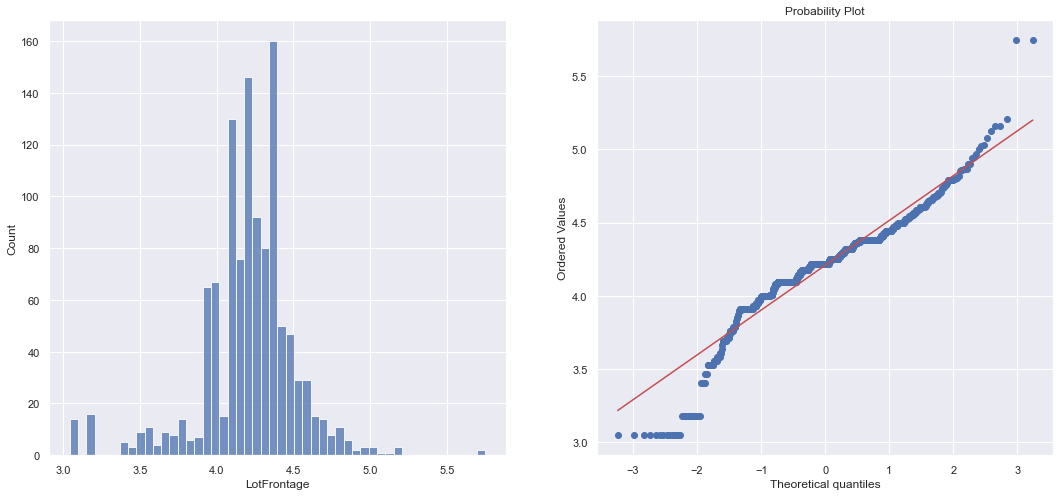

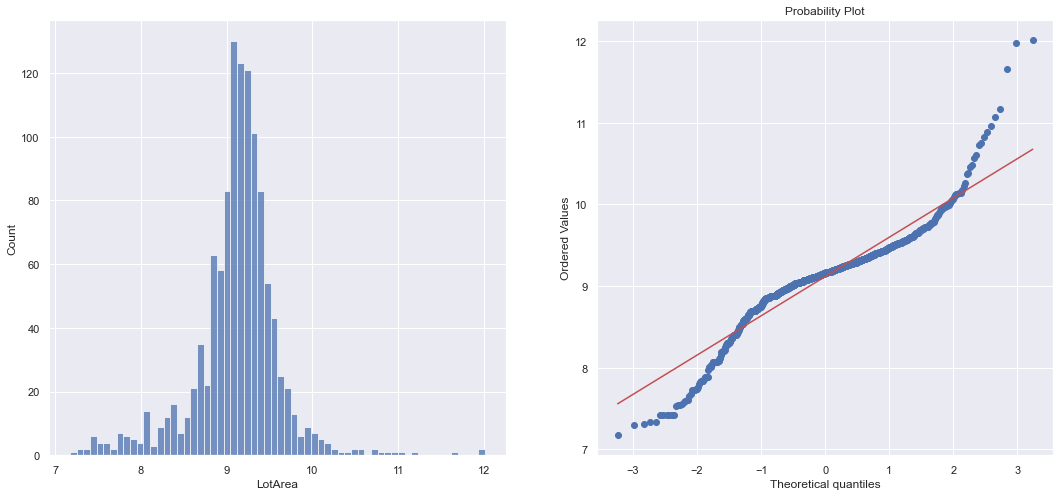

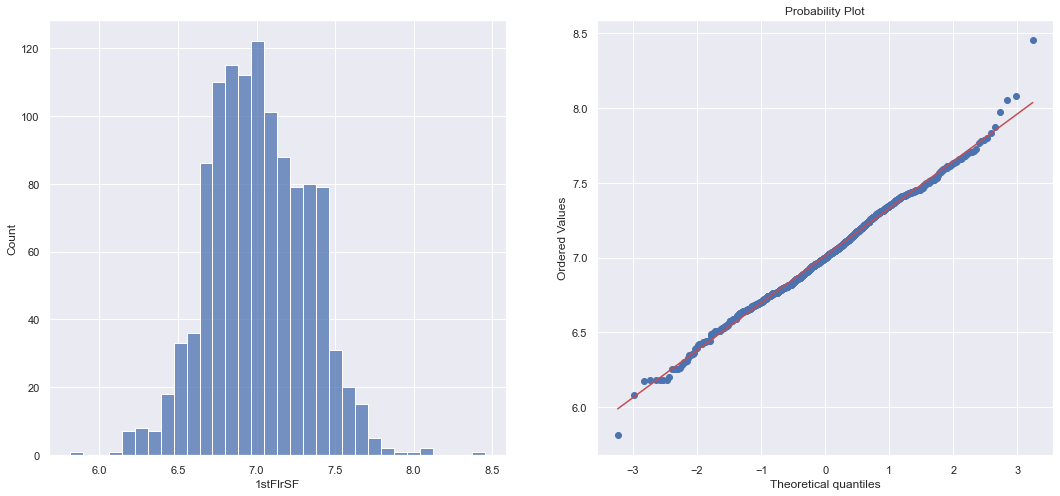

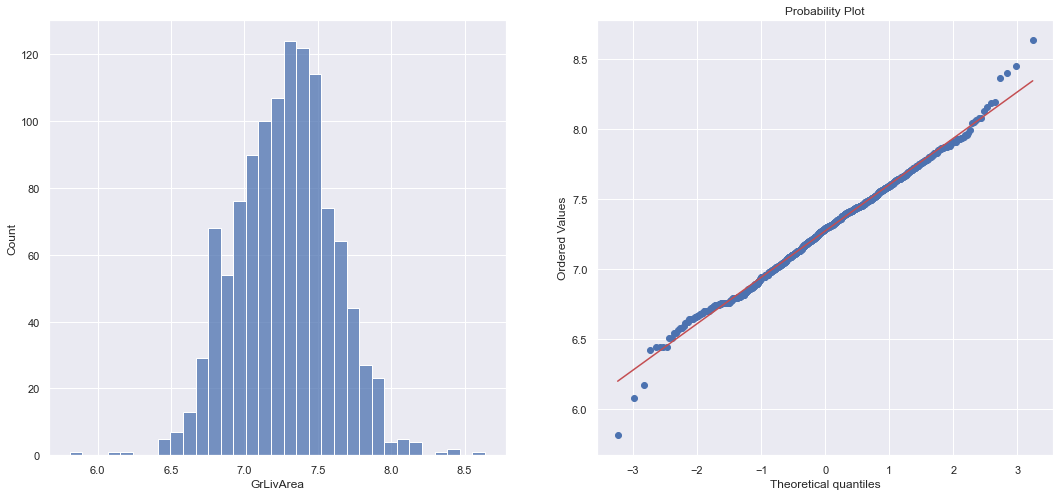

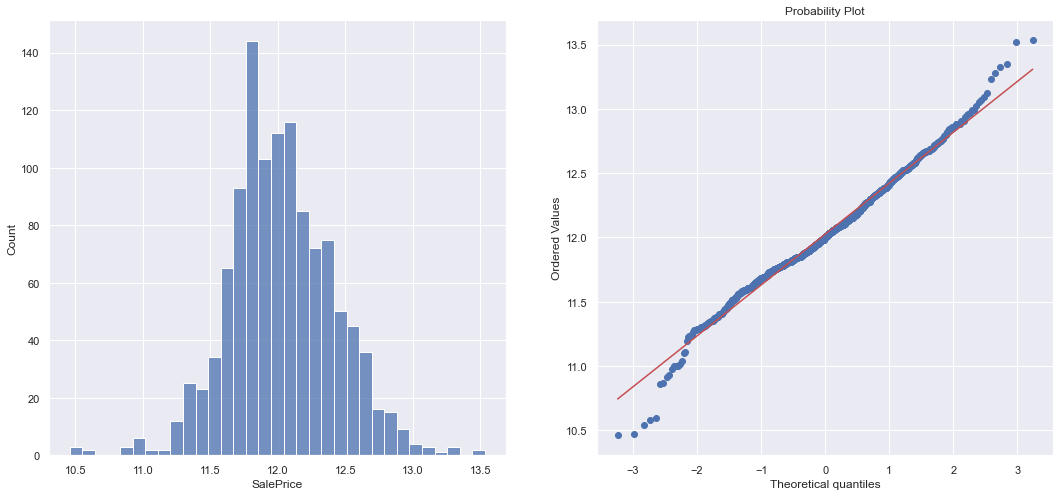

In [41]:
qqplot(all_num_var)

As we already did the log transformation we can see that continous variables with non zero elements are now close to normal distribution.

# ANOVA TEST FOR CATEGORICAL VARIABLE TO CHECK VARIABLE IMP.

In [42]:
#now analysing the catgorical features of the data set
#using anova I will find the importance of categorical features.

***My null hypothesis is that all categorical features are equally important to the Sale Price.  And alternative hypothesis is that there is significant influence  of each categorical feature towards Sale Price.  I will do anova one way test and check the p-value. If the p-value is smaller than 0.5 then I will reject my null hypothesis that means the categorical features have some influence on the Sale Price***

In [43]:
from scipy import stats

anova = {'Feature':[], 'f-score':[], 'p-value':[]}

for var in cat_var:
    grouped_prices = []
    for group in train[var].unique():
        grouped_prices.append(train[train[var]==group]['SalePrice'].values)
        
    f, p = stats.f_oneway(*grouped_prices)
        
    anova['Feature'].append(var)
    anova['f-score'].append(f)
    anova['p-value'].append(p)
        
anova = pd.DataFrame(anova)
anova = anova[['Feature','f-score','p-value']]

In [44]:
anova.sort_values(by='p-value',inplace=True)

In [45]:
#least iportant features
anova[anova['p-value']>0.05]

Feature   f-score   p-value
10    Condition2  2.003304  0.051741
52       MiscVal  1.526728  0.068254
51   MiscFeature  2.093142  0.079579
53        MoSold  1.521462  0.117694
54        YrSold  1.055095  0.377519
7      LandSlope  0.083772  0.919647
33  BsmtHalfBath  0.022901  0.977359

In [46]:
#features that influence the Sale Price
imp_cat_feature = anova[anova['p-value']<0.05]
imp_cat_feature

Feature     f-score        p-value
13    OverallQual  265.417444  1.654012e-273
8    Neighborhood   60.849465  1.251701e-184
45     GarageCars  258.654418  9.547068e-159
23       BsmtQual  241.615110  7.911453e-151
20      ExterQual  313.380174  6.869926e-149
38    KitchenQual  311.882222  2.373151e-148
44   GarageFinish  241.513720  1.146619e-121
34       FullBath  217.689039  5.958798e-112
43     GarageType  100.134162  1.854273e-101
0      MSSubClass   41.138742   3.442138e-91
42    FireplaceQu  103.918661   1.240733e-90
22     Foundation   96.000584   1.144295e-84
39   TotRmsAbvGrd   45.156537   5.384589e-82
41     Fireplaces  135.527124   3.034658e-75
29      HeatingQC   88.536679   1.126803e-65
26   BsmtFinType1   57.394508   3.254328e-62
19     MasVnrType   83.523255   6.446611e-49
17    Exterior1st   21.178072   1.729327e-45
1        MSZoning   57.650573   2.131849e-44
14    OverallCond   30.853051   4.955756e-44
18    Exterior2nd   17.811094   1.777632e-40
47     GarageCond   41.444847   2.583313e-39
46     GarageQual   38.192429   2.395478e-36
56  SaleCondition   35.900235   3.089188e-34
30     CentralAir  157.567642   5.586163e-34
25   BsmtExposure   40.914938   4.207584e-32
35       HalfBath   73.757125   7.074566e-31
55       SaleType   19.647454   5.855155e-28
12     HouseStyle   21.180371   5.665655e-27
48     PavedDrive   60.123141   1.436939e-25
31     Electrical   31.211706   1.034422e-24
24       BsmtCond   30.023607   8.567260e-24
4        LotShape   36.531173   1.475903e-22
36   BedroomAbvGr   13.543502   6.675771e-17
32   BsmtFullBath   21.192897   2.285435e-13
21      ExterCond   14.985063   6.026584e-12
50          Fence   14.399736   1.770047e-11
9      Condition1    6.812233   9.079354e-09
15      RoofStyle    9.194363   1.359582e-08
28        Heating    8.899837   2.640191e-08
27   BsmtFinType2    7.830185   2.789949e-08
11       BldgType   10.112997   4.773143e-08
3           Alley   14.636759   5.276593e-07
37   KitchenAbvGr    8.808583   8.915945e-06
6       LotConfig    6.662726   2.663422e-05
40     Functional    5.115205   3.383097e-05
5     LandContour    6.784106   1.554648e-04
16       RoofMatl    3.981678   2.598000e-04
49         PoolQC    4.013494   7.440128e-03
2          Street    5.441722   1.983173e-02

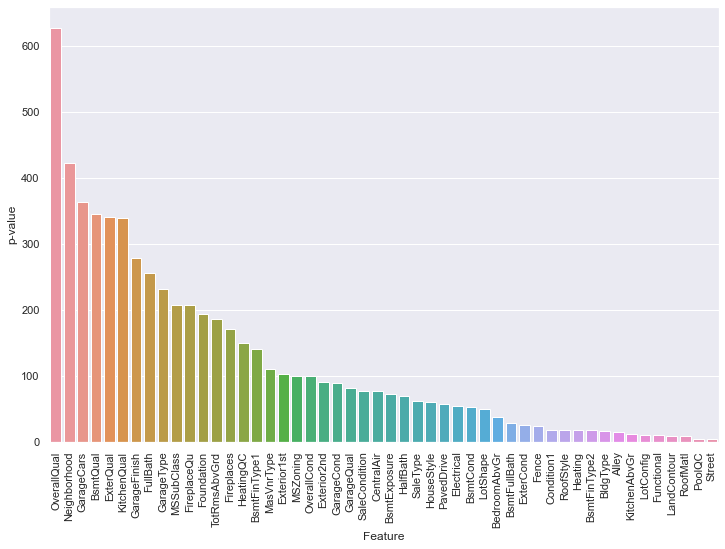

In [47]:
#order wise Feature importance
plt.figure(figsize=(12,8))
sns.barplot(imp_cat_feature['Feature'],np.log(1./imp_cat_feature['p-value']))
plt.xticks(rotation=90)
plt.show()

#top 15 features categorical features which are important for predicting the sale price

1. Overall Quality of the house - as the quality of raw material,furnishing increases the sale price also increases, Overall Quality includes all the things which are related to the cuntruction of the house. Like Raw material, Paint work, wooden work etc. Higher the quality higher will be the Price

2. Neighbor hood shows the location of the house, what are the things that are near to the house also influence the Price of the House. House near or in a good neighbor hood will have a high influence on the price of the house.

3. Basment Quality - this feature shows the hight of the Basement, Higer the Hight of the Basement will leads to Higher price of the House. House with basements are generally more expensive.

4. Kitchen Quality - includes Kitchen type like modular, or old type. Quality of the Kitchen also influence the Price of the House, as Kitchen includes varius things on which the quality is measured.

5. Exterior Quality - this features shows the quality of the house from outside as well, this focuses on if the outside of the house is perfect from the outside or not.

6. Garage Cars - Number of cars can be parked in the Garage can be dependent on the Garage area, however it is not always true that the large area can includes many cars, as the area can be of any shape, so here we will be taking Garage Cars instead of Garage Area.

7. Full Bath - A full bathroom is made up of four parts: a sink, a shower, a bathtub, and a toilet. ... Therefore, a bathroom with a sink, toilet, and shower is considered a three-quarter bath. A bathroom with just a sink and a toilet is a half-bath. As the number of Full Bath above grade means Number of Full bath not in basementr but on upper part of the house will have more Sale Price.

8. Total Rooms above grade - this feature means the total number of rooms not in the basement but in the upper part of the house, more the number of rooms , more the Sale Price

9. Firplace Quality also influencing the price of the house, the better the qualiy the more will be the Price.

10. Garage Finish - If the Garage is properly Finished the Price tends to be High

11. Foundation - It shows how the House was constructed for ex - bricks, tiles, stones etc.

12. BasmentFintype1 - this shows the rating of the basement finished area

13. MSSubClass -  type of living quarters/house in which a person resides. 

14. Garage type also influence the price, there can be different types of garage in a house.

15. HeatingQC - it refers to heating qualicty and condition which is required in the house.